# Filtracja obrazu

In [1]:
import cv2
from matplotlib import pyplot as plt

def plot_cv2(image):
    return plt.imshow(
        cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    )

plt.rcParams['figure.figsize'] = [16, 8]

Wymiary obrazu:  (580, 880, 3)


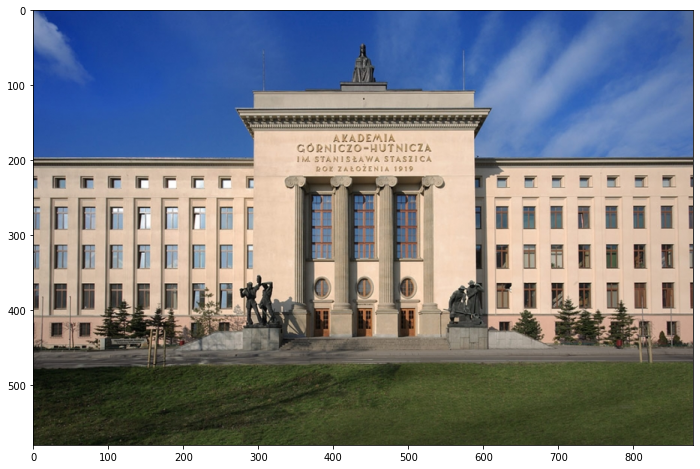

In [2]:
image = cv2.imread("lab3_1.jpg")
print(f"Wymiary obrazu:  {image.shape}")
f = plt.figure(1)
plot_cv2(image)

### b) Proszę sprawdzić i porównać wynik następującej operacji: zmniejszania rozmiaru obrazu o 50 % - jedną z wybranych metod - a następnie zwiększenie o 50% z użyciem wszystkich dostępnych w OpenCV metod interpolacji. Proszę porównać uzyskany wynik z obrazem pierwotnym.

(290, 440, 3)

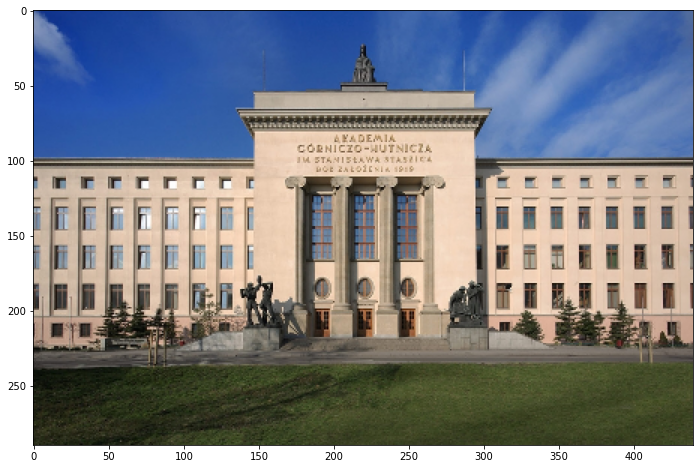

In [3]:
interpolations = [
    cv2.INTER_NEAREST,
    cv2.INTER_LINEAR,
    cv2.INTER_AREA,
    cv2.INTER_CUBIC,
    cv2.INTER_LANCZOS4,
]

titles = [
    'cv2.INTER_NEAREST',
    'cv2.INTER_LINEAR',
    'cv2.INTER_AREA',
    'cv2.INTER_CUBIC',
    'cv2.INTER_LANCZOS4',
]


image_resized = cv2.resize(
    image, 
    dsize = None, 
    fx = 0.5, 
    fy = 0.5,
    interpolation = interpolations[0]
)
plot_cv2(image_resized)
image_resized.shape

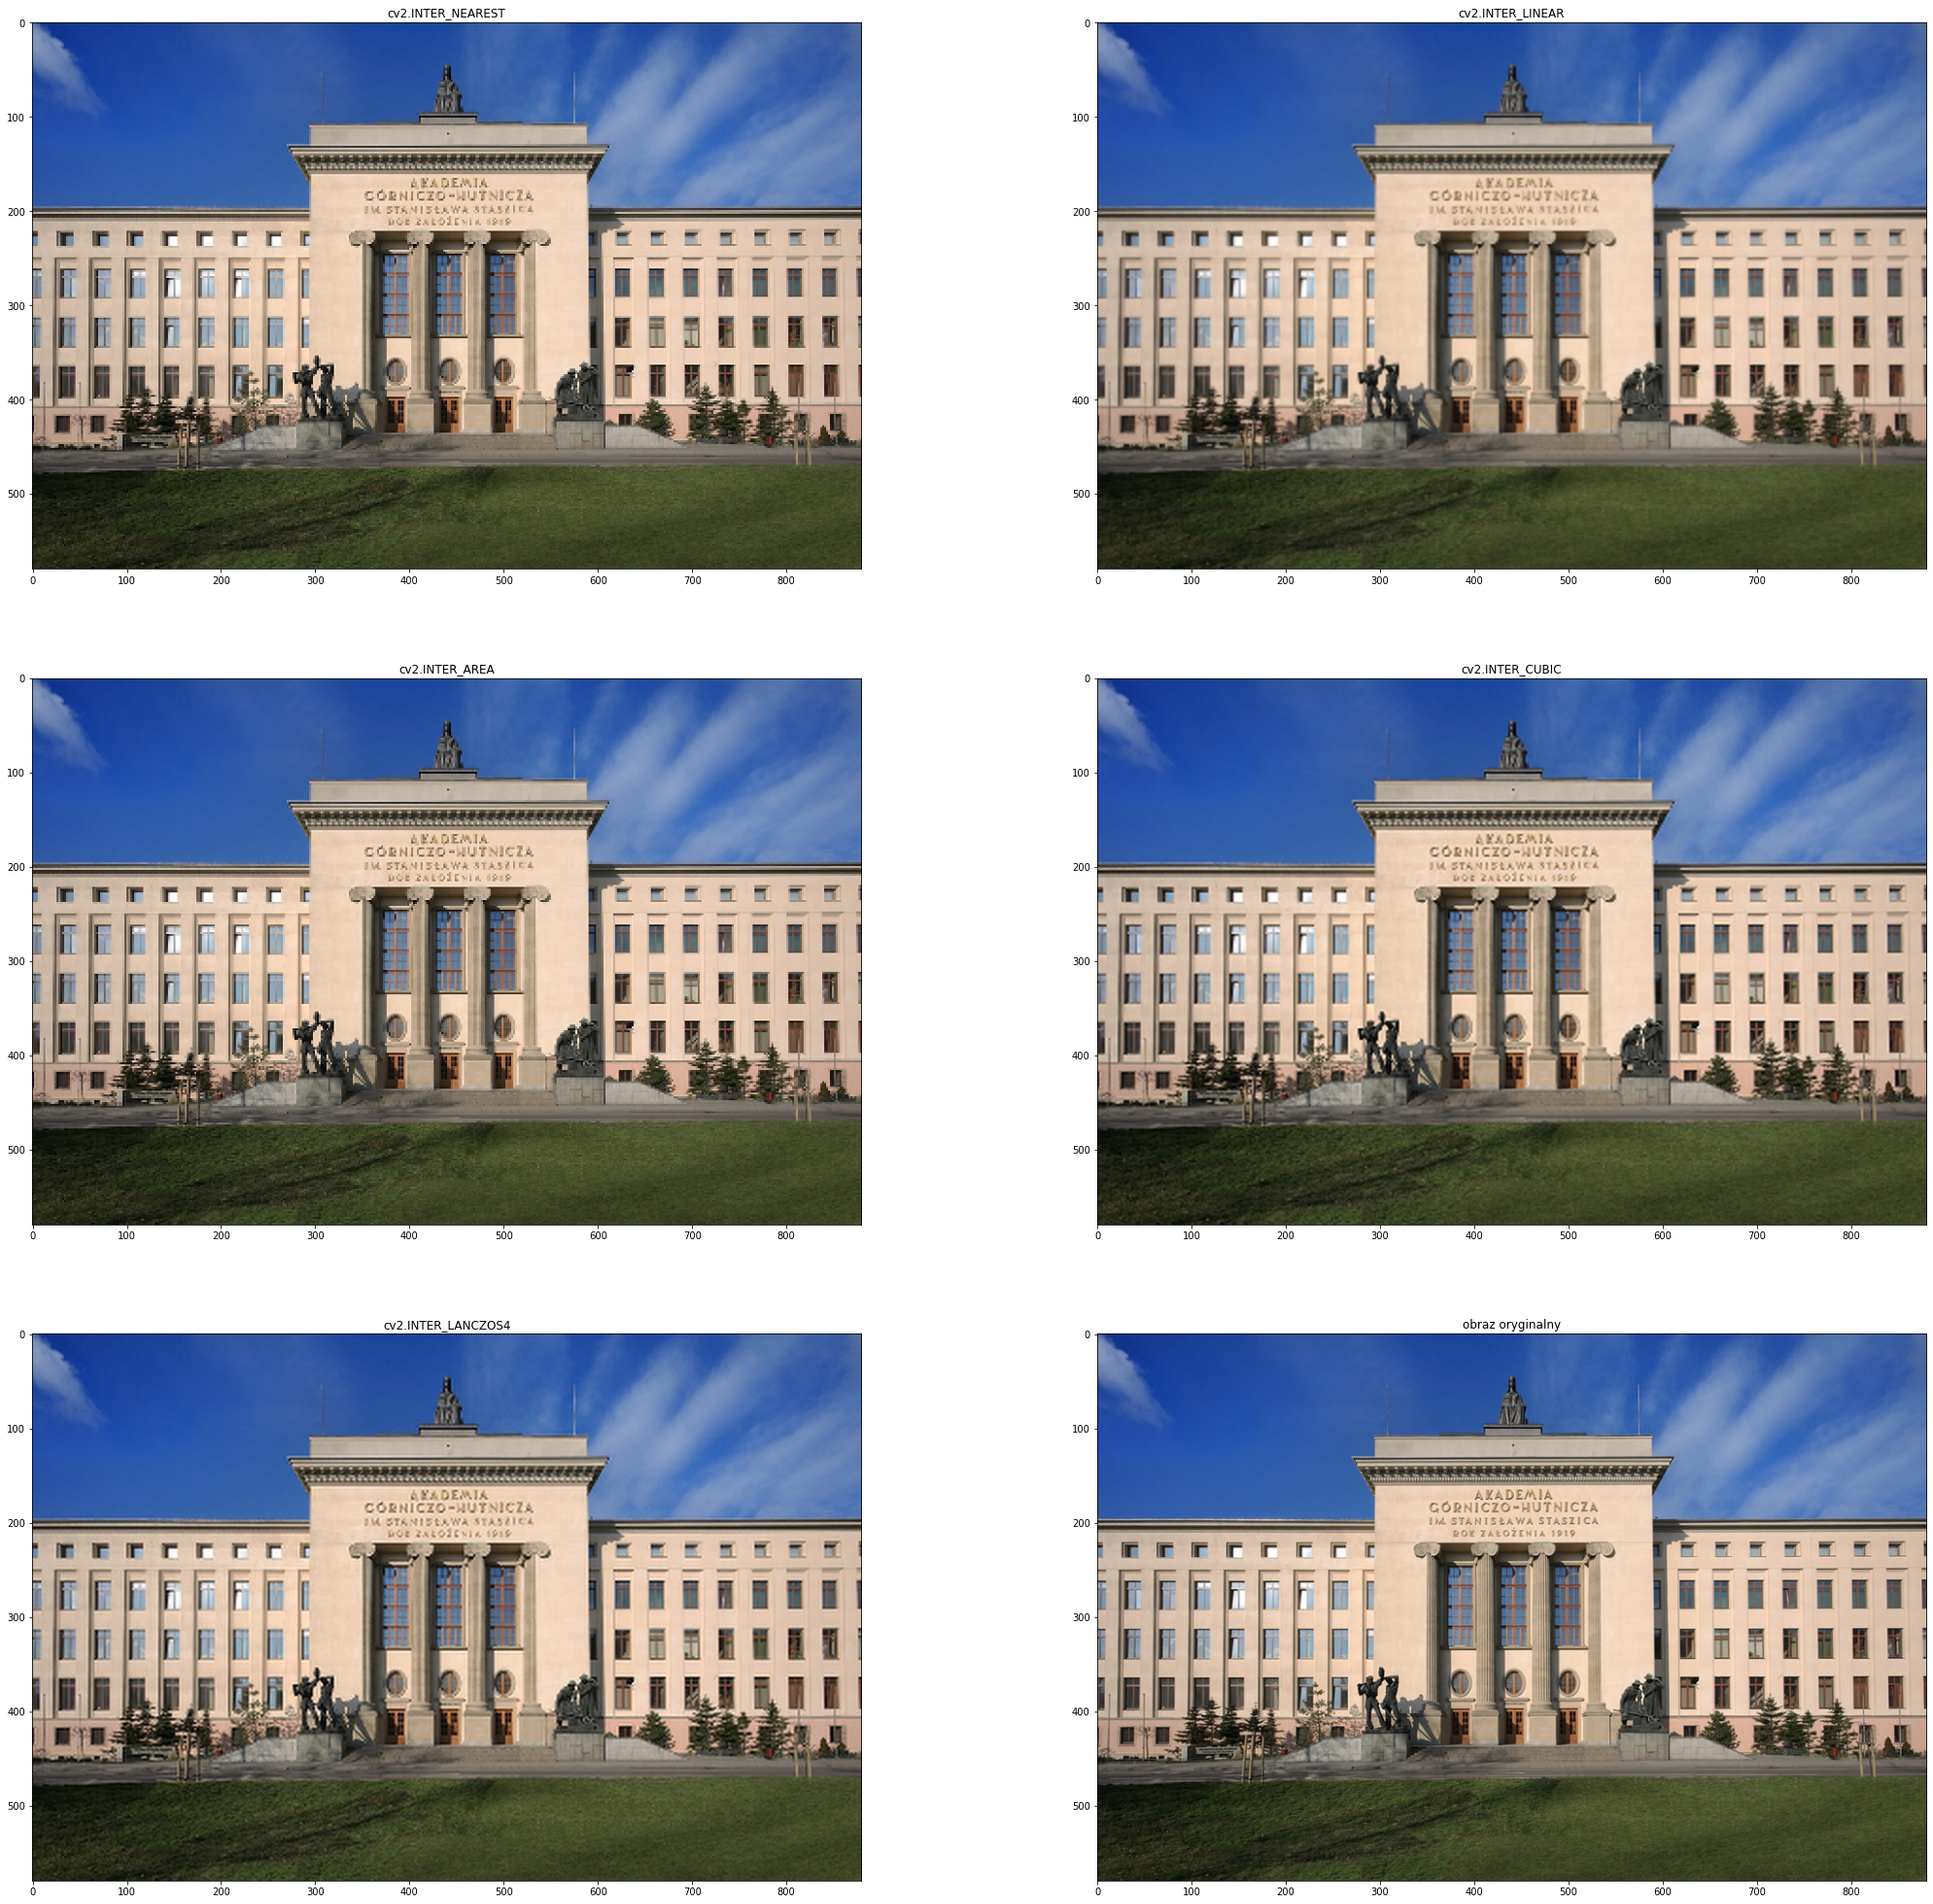

In [4]:
f = plt.figure(1, figsize=(2*18, 2*30))
for i, interpolation in enumerate(interpolations):
    img = cv2.resize(
        image_resized, 
        dsize = None, 
        fx = 2, 
        fy = 2,
        interpolation = interpolation
    )
    ax = f.add_subplot(len(interpolations), 2, i+1)
    ax.set_title(f"{titles[i]}")
    plot_cv2(img)
ax = f.add_subplot(len(interpolations), 2, 6)
ax.set_title(f"obraz oryginalny")
plot_cv2(image)

---

### c) Proszę nałożyć na obraz filtr uśredniający o macierzy K w rozmiarze 5x5, 10x10 i 15x15. Jaki efekt został zaobserwowany?

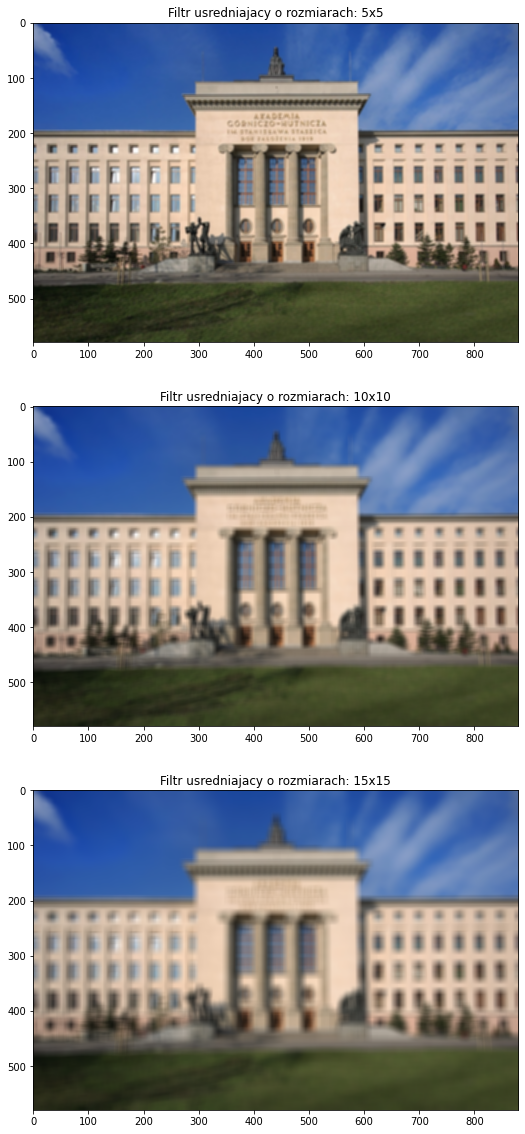

In [5]:
import numpy as np

f = plt.figure(1, figsize=(20, 20))
K_size = [5, 10, 15]
for i, size in enumerate(K_size):  
    img = cv2.blur(image, (size, size))
    ax = f.add_subplot(len(K_size), 1, i+1)
    ax.set_title(f"Filtr usredniajacy o rozmiarach: {size}x{size}")
    plot_cv2(img)

---

### d) Proszę nałożyć na obraz filtr medianowy o rozmiarze 5x5, 11x11 i 15x15. Jaki efekt zostałzaobserwowany?

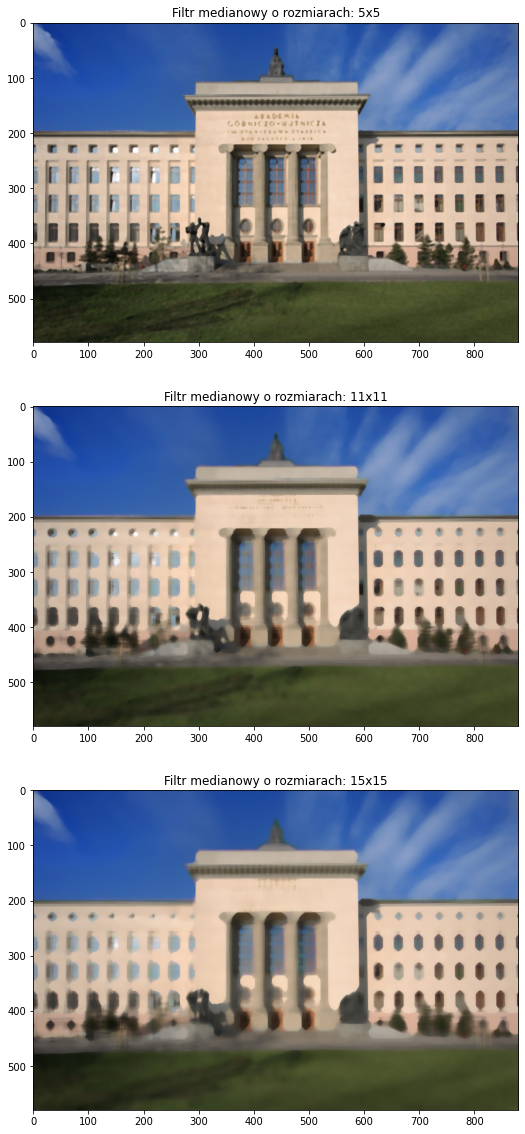

In [6]:
f = plt.figure(1, figsize=(20, 20))
K_size = [5, 11, 15]
for i, size in enumerate(K_size):  
    img = cv2.medianBlur(image, size)
    ax = f.add_subplot(len(K_size), 1, i+1)
    ax.set_title(f"Filtr medianowy o rozmiarach: {size}x{size}")
    plot_cv2(img)

---

### e) Proszę nałożyć na obraz filtr gaussowski (o rozmiarze 5) i zaobserwować uzyskane wyniki.

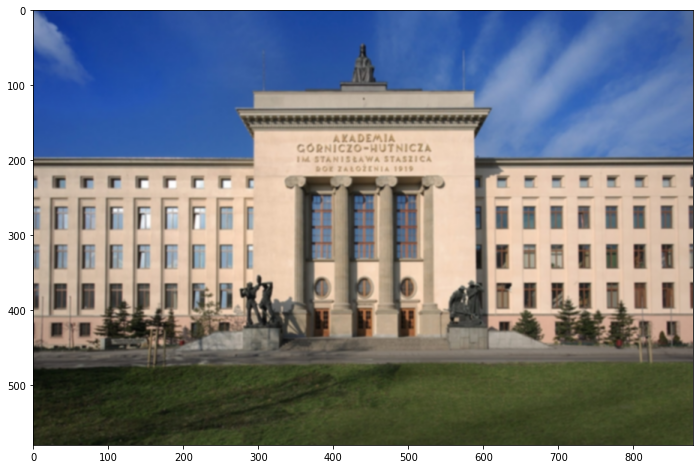

In [7]:
img_gauss_blur = cv2.GaussianBlur(
    image, 
    (5, 5), 
    0, #automatyczne wyliczenie parametru sigma w obu kierunkach
)
plot_cv2(img_gauss_blur)

---

### f) Proszę zbinaryzować obraz po przefiltrowaniu go powyższymi metodami i porównać do binaryzacji bez filtracji.

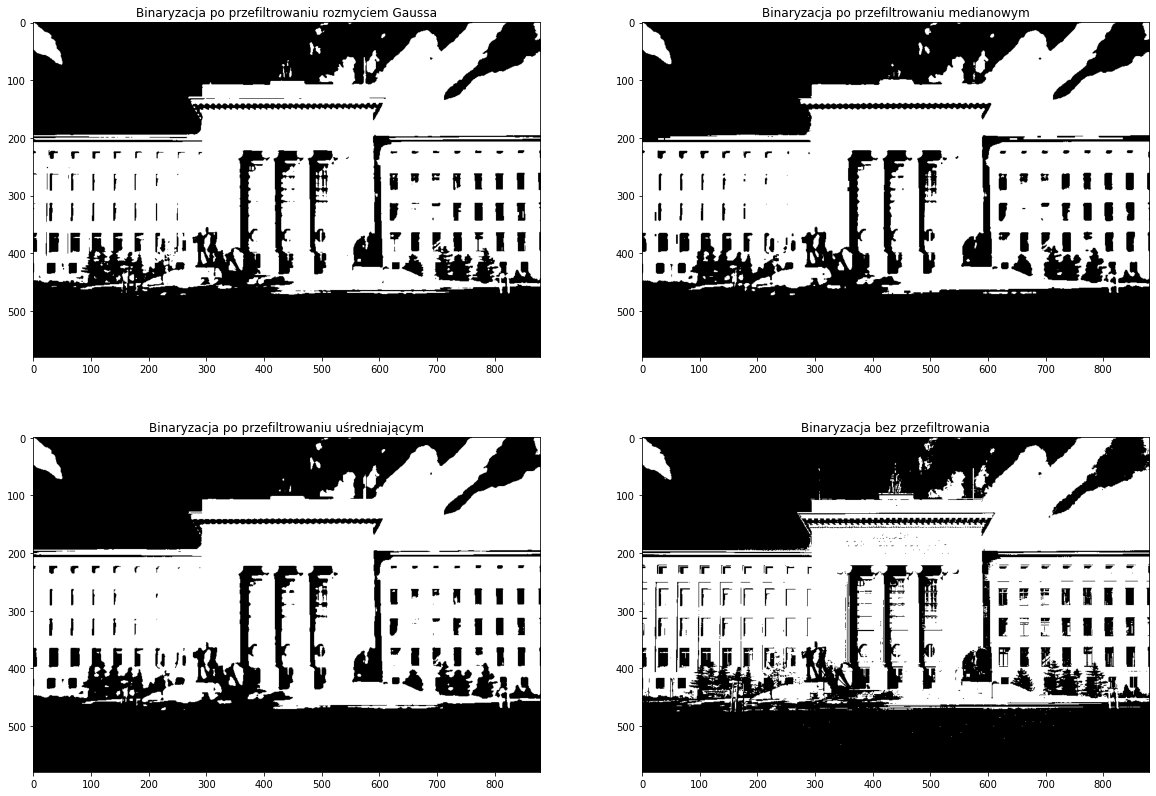

In [8]:
img_gauss_blur_gray = cv2.cvtColor(img_gauss_blur, cv2.COLOR_BGR2GRAY)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

img = cv2.medianBlur(image, 5)
img_median_blur_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = cv2.blur(image, (5, 5))
img_blur_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

threshold_min = 100
threshold_max = 255

f = plt.figure(1, figsize=(20, 14))

ret, img = cv2.threshold(
    img_gauss_blur_gray.copy(),
    threshold_min,
    threshold_max,
    cv2.THRESH_BINARY
)
ax = f.add_subplot(2, 2, 1)
ax.set_title("Binaryzacja po przefiltrowaniu rozmyciem Gaussa")
plt.imshow(img, cmap='gray');

ret, img = cv2.threshold(
    img_median_blur_gray.copy(),
    threshold_min,
    threshold_max,
    cv2.THRESH_BINARY
)
ax = f.add_subplot(2, 2, 2)
ax.set_title("Binaryzacja po przefiltrowaniu medianowym")
plt.imshow(img, cmap='gray');

ret, img = cv2.threshold(
    img_blur_gray.copy(),
    threshold_min,
    threshold_max,
    cv2.THRESH_BINARY
)
ax = f.add_subplot(2, 2, 3)
ax.set_title("Binaryzacja po przefiltrowaniu uśredniającym")
plt.imshow(img, cmap='gray');

ret, img = cv2.threshold(
    image_gray.copy(),
    threshold_min,
    threshold_max,
    cv2.THRESH_BINARY
)
ax = f.add_subplot(2, 2, 4)
ax.set_title("Binaryzacja bez przefiltrowania")
plt.imshow(img, cmap='gray');


---

### g) Proszę nałożyć na obraz filtry Roberts cross, Prewitta i Sobela.

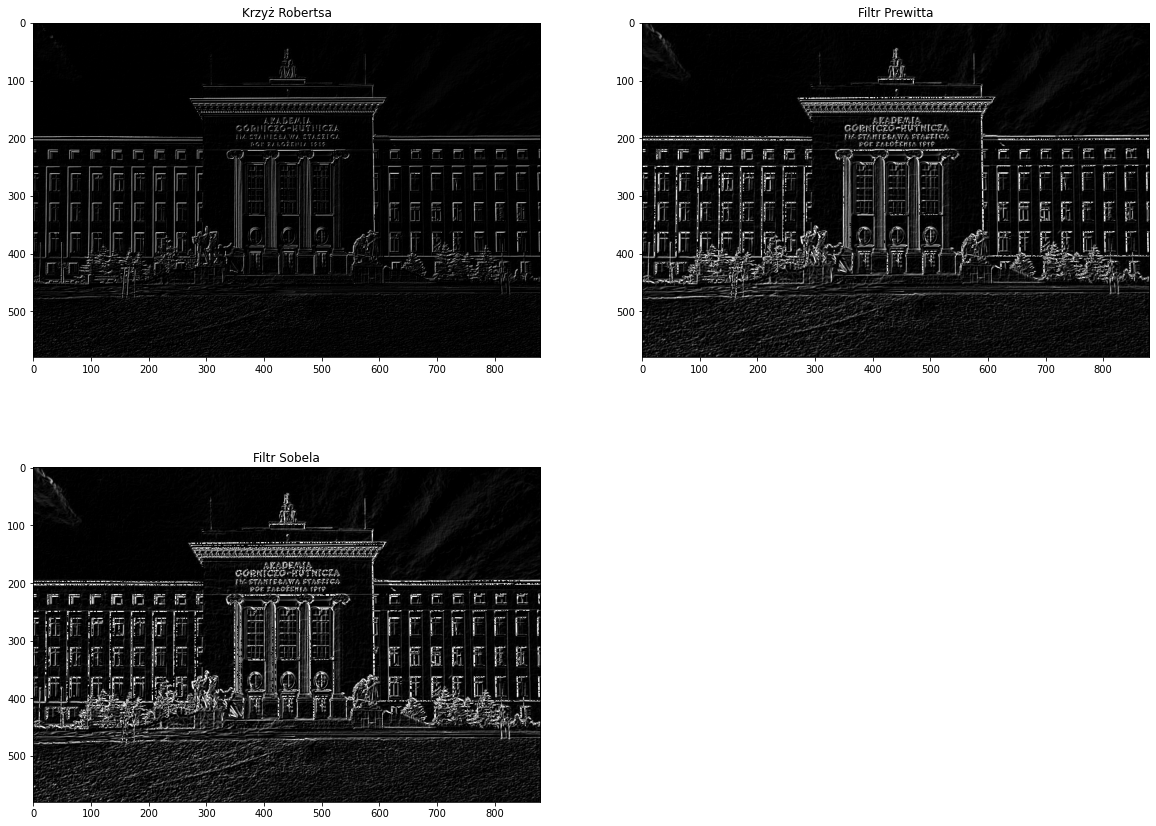

In [9]:
roberts_cross = np.array([
    [1,  0],
    [0, -1]
])

prewitt = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

sobel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

filters = [
    roberts_cross,
    prewitt,
    sobel
]

titles = [
    'Krzyż Robertsa',
    'Filtr Prewitta',
    'Filtr Sobela'
]

f = plt.figure(1, figsize=(20, 15))

for i, filter_ in enumerate(filters):
    kernel_y = filter_
    kernel_x = np.transpose(filter_)
    img_x = cv2.filter2D(
        src = image_gray.copy(),
        ddepth = -1,
        kernel = kernel_x
    )
    
    img_y = cv2.filter2D(
        src = image_gray,
        ddepth = -1,
        kernel = kernel_y
    )
    
    ax = f.add_subplot(2, 2, i+1)
    ax.set_title(f"{titles[i]}")
    plot_cv2(img_x + img_y)